In [44]:
import numpy as np
import os
import ast

import matplotlib.pyplot as plt

import pickle
from openfermion.ops import QubitOperator

In [45]:
cw_dir = os.getcwd()
CS_VQE_dir = os.path.dirname(cw_dir) # gets directory where running python file is!
data_dir = os.path.join(CS_VQE_dir,'data')
hamiltonian_data = os.path.join(data_dir, 'hamiltonians.txt')

In [9]:
# Tapered Hamiltonians
with open(hamiltonian_data, 'r') as input_file:
    tapered_hamiltonians = ast.literal_eval(input_file.read())
    
tapered_H_size_qubits = {
                            mol_key: {'n_qubits': tapered_hamiltonians[mol_key][1],
                                      'n_terms': len(tapered_hamiltonians[mol_key][2])}
                            for mol_key in tapered_hamiltonians}
del tapered_hamiltonians

In [5]:
# Pre tapered Hamiltonians
data_pretap_hamiltonians_file = os.path.join(data_dir, 'Hamiltonians_pre_tapering.txt')
with open(data_pretap_hamiltonians_file, 'r') as input_file:
    NON_tapered_hamiltonians = ast.literal_eval(input_file.read())

NON_tapered_H_size_qubits = {
                            mol_key: {'n_qubits': len(list(NON_tapered_hamiltonians[mol_key].keys())[0]),
                                      'n_terms': len(NON_tapered_hamiltonians[mol_key])}
                            for mol_key in NON_tapered_hamiltonians}
del NON_tapered_hamiltonians

In [6]:
for key in NON_tapered_H_size_qubits.keys():
    print(f"{key: <60}     No. terms:  {NON_tapered_H_size_qubits[key]['n_terms']:<7.0f}  No.qubits:  {NON_tapered_H_size_qubits[key]['n_qubits']:<5.0f}")

Ne1_STO-3G_singlet_NeNe                                          No. terms:  156      No.qubits:  10   
O2_STO-3G_triplet_O2O2                                           No. terms:  3075     No.qubits:  20   
Na1_STO-3G_doublet_NaNa                                          No. terms:  3340     No.qubits:  18   
H2-C2_STO-3G_singlet_EthyneEthyne                                No. terms:  6401     No.qubits:  24   
H1-N1-O3_STO-3G_singlet_HNO3HNO3                                 No. terms:  280136   No.qubits:  42   
H1-F1_3-21G_singlet_HF_3-21GHF_3-21G                             No. terms:  13958    No.qubits:  22   
Cl1_STO-3G_doublet_ClCl                                          No. terms:  2092     No.qubits:  18   
H2-C1-O1_STO-3G_singlet_MethanalMethanal                         No. terms:  9257     No.qubits:  24   
P1_STO-3G_quartet_PP                                             No. terms:  3388     No.qubits:  18   
H2-O1_3-21G_singlet_H2O_3-21GH2O_3-21G                          

In [46]:
# molecule names in hamiltonians and hamiltonians before tapering are different
# requires using regular expressions to select correct terms
# done below (code replaces pre-tapered hamiltonian names with naming done by Will!)

import re
pre_tap_hamiltonians_relevent={}
for mol_name_PreT in NON_tapered_H_size_qubits:
    for mol_name in tapered_H_size_qubits.keys():
        if bool(re.match(f'^{mol_name}.*$', mol_name_PreT)): # NO wildcard at front. Wildcard at end
            pre_tap_hamiltonians_relevent[mol_name] = NON_tapered_H_size_qubits[mol_name_PreT]

In [47]:
# check we have same molecules!
sorted(list(pre_tap_hamiltonians_relevent.keys())) == sorted(list(tapered_H_size_qubits.keys()))

True

In [48]:
for key in tapered_H_size_qubits.keys():
    print(f"{key: <25}     No. terms original:  {pre_tap_hamiltonians_relevent[key]['n_terms']:<6.0f}   No. terms tapering:  {tapered_H_size_qubits[key]['n_terms']:<5.0f}")

H2-S1_STO-3G_singlet          No. terms original:  6246     No. terms tapering:  6237 
C1-O1_STO-3G_singlet          No. terms original:  5475     No. terms tapering:  4409 
H1-Cl1_STO-3G_singlet         No. terms original:  8159     No. terms tapering:  4409 
H1-Na1_STO-3G_singlet         No. terms original:  5851     No. terms tapering:  4409 
H2-Mg1_STO-3G_singlet         No. terms original:  4582     No. terms tapering:  3540 
H1-F1_3-21G_singlet           No. terms original:  13958    No. terms tapering:  6852 
H1-Li1_3-21G_singlet          No. terms original:  8758     No. terms tapering:  6852 
Be1_STO-3G_singlet            No. terms original:  156      No. terms tapering:  102  
H1-F1_STO-3G_singlet          No. terms original:  631      No. terms tapering:  558  
H1-Li1_STO-3G_singlet         No. terms original:  631      No. terms tapering:  558  
Ar1_STO-3G_singlet            No. terms original:  2092     No. terms tapering:  1465 
F2_STO-3G_singlet             No. terms ori

In [49]:
## import myriad results
myriad_results_dir = os.path.join(cw_dir,'myriad_results')

myriad_results = {}
for filename in os.listdir(myriad_results_dir):
    if filename.endswith('.pickle'):
        file_path = os.path.join(myriad_results_dir, filename) 
        mol_name = filename[37:-8]
        with open(file_path,'rb') as infile:
            data = pickle.load(infile)
        myriad_results[mol_name] = data

In [52]:
myriad_results['H3_STO-3G_singlet_1+'].keys()

dict_keys(['exp_conditions', 'cs_vqe_seqrot', 'cs_vqe_LCU', 'cs_vqe_seqrot_energies', 'cs_vqe_LCU_energies', 'cs_vqe_seqrot_M_seqrot', 'cs_vqe_LCU_M_LCU'])

In [89]:
myriad_results['H3_STO-3G_singlet_1+']['cs_vqe_seqrot_M_seqrot'][0]

{'AC_sets': {}, 'energy': 0}

In [77]:
myriad_results['H3_STO-3G_singlet_1+']['cs_vqe_LCU_energies'][1]

{'E': -2.9157104293639797,
 'H': {'I': (-2.1802002532456584+0j),
  'Z': (0.7230126654710649+0j),
  'X': (-0.13501075787517963+0j)}}

In [43]:
# myriad_results[].keys()

# myriad_results['H3_STO-3G_singlet_1+']['exp_conditions']['true_gs']

In [83]:
def plot_n_terms_and_error(non_tapered_H_dict,
                           tapered_H_dict,
                           results_dict,
                           mol_name,  
                           dpi=200):
    # https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
    
    # mol_dict = list of lists of anticommuting sets and standard contextual H
    # paper_results_dict =  CS-VQE paper results dict
    # Nterms_H_dict = dict of number of terms in each molecular hamiltonian without any method applied!
    
    ## get total number of terms for each reduction
    
    True_gs_energy = results_dict[mol_name]['exp_conditions']['true_gs']
    
    
    # Get no. terms and energy error
    
    cs_vqe_seqrot_terms = []
    cs_vqe_seqrot_energies =[]
    
    cs_vqe_LCU_terms = []
    cs_vqe_LCU_energies =[]
    
    
    UP_SeqRot_ontop_CS_VQE_SeqRot_terms =[]
    UP_SeqRot_ontop_CS_VQE_SeqRot_energies=[]
    
    UP_LCU_ontop_CS_VQE_LCU_terms =[]
    UP_LCU_ontop_CS_VQE_LCU_energies=[]
    
    for ind_key in myriad_results[mol_name]['cs_vqe_LCU_energies'].keys():
        
        ##### CS-VQE only results
        # seqrot
        cs_vqe_seqrot_terms.append(len(myriad_results[mol_name]['cs_vqe_seqrot_energies'][ind_key]['H']))
        cs_vqe_seqrot_energies.append(myriad_results[mol_name]['cs_vqe_seqrot_energies'][ind_key]['E'])
        
        #LCU
        cs_vqe_LCU_terms.append(len(myriad_results[mol_name]['cs_vqe_LCU_energies'][ind_key]['H']))
        cs_vqe_LCU_energies.append(myriad_results[mol_name]['cs_vqe_LCU_energies'][ind_key]['E'])
        
        
        #### Measurement reduction results
        # seq rot
        UP_SeqRot_ontop_CS_VQE_SeqRot_terms.append(len(myriad_results[mol_name]['cs_vqe_seqrot_M_seqrot'][ind_key]['AC_sets']))
        UP_SeqRot_ontop_CS_VQE_SeqRot_energies.append(myriad_results[mol_name]['cs_vqe_seqrot_M_seqrot'][ind_key]['energy'])
        
        # LCU
        UP_LCU_ontop_CS_VQE_LCU_terms.append(len(myriad_results[mol_name]['cs_vqe_LCU_M_LCU'][ind_key]['AC_sets']))
        UP_LCU_ontop_CS_VQE_LCU_energies.append(myriad_results[mol_name]['cs_vqe_LCU_M_LCU'][ind_key]['energy'])
    
    n_qubits = np.array([i for i in range(len(UP_LCU_ontop_CS_VQE_LCU_terms))]) # labels
    
    # error cs vqe only
    cs_vqe_LCU_errors = np.abs(np.array(cs_vqe_LCU_energies)- True_gs_energy)
    cs_vqe_seq_errors = np.abs(np.array(cs_vqe_seqrot_energies)- True_gs_energy)
    
    # error cs vqe with m_reduction
    UP_LCU_ontop_CS_VQE_LCU_errors = np.abs(np.array(UP_LCU_ontop_CS_VQE_LCU_energies)- True_gs_energy)
    UP_SeqRot_ontop_CS_VQE_SeqRot_errors = np.abs(np.array(UP_SeqRot_ontop_CS_VQE_SeqRot_energies)- True_gs_energy)
    
    
    width = 0.2  # the width of the bars
    offset = 0.1 # offset on x axis
    
    fig, ax = plt.subplots(dpi=dpi)
    rects1 = ax.bar(n_qubits - (offset+width), cs_vqe_seqrot_terms, width, label='CS-VQE $|H_{S}|$',color="yellowgreen")
    rects2 = ax.bar(n_qubits - offset, cs_vqe_LCU_terms, width, label='CS-VQE $|H_{LCU}|$',color="royalblue")
    rects3 = ax.bar(n_qubits + offset, UP_SeqRot_ontop_CS_VQE_SeqRot_terms, width, label='CS-VQE + $UP_{SeqRot}$: $|H_{S}^{UP_{SeqRot}}|$',color="crimson")
    rects4 = ax.bar(n_qubits + (offset+width), UP_LCU_ontop_CS_VQE_LCU_terms, width, label='CS-VQE LCU + $UP_{LCU}$: $|H_{LCU}^{UP_{LCU}}|$',color="darkorchid")

    ax.set_ylabel('Number of terms')
    ax.set_xlabel('Number of qubits')
    

    tapered_N_terms = tapered_H_dict[mol_name]['n_terms']
    tapered_N_qubits = tapered_H_dict[mol_name]['n_qubits']
    rects5 = ax.bar(tapered_N_qubits + (offset+2*width), tapered_N_terms, width, label='$|H_{full}^{tapered}|$',color="darkorange")
    
    pre_tapered_N_terms = non_tapered_H_dict[mol_name]['n_terms']
    pre_tapered_N_qubits = non_tapered_H_dict[mol_name]['n_qubits']
    rects6 = ax.bar(pre_tapered_N_qubits, pre_tapered_N_terms, width, label='$|H_{full}|$',color="darkgrey")

    ####  second y axis!    
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(n_qubits,cs_vqe_seq_errors,color="yellowgreen",marker="2", label='CS-VQE SeqRot error', markersize=12)
    ax2.plot(n_qubits,cs_vqe_LCU_errors,color="royalblue",marker="x", linestyle='', label='CS-VQE LCU error')
    ax2.plot(n_qubits,UP_SeqRot_ontop_CS_VQE_SeqRot_errors,color="crimson",marker="+", linestyle='', label='CS-VQE_SeqRot + $UP_{SeqRot}$ error')
    ax2.plot(n_qubits,UP_LCU_ontop_CS_VQE_LCU_errors,color="darkorchid",marker="1", linestyle='', label='CS-VQE LCU + $UP_{LCU}$ error')
    ax2.set_ylabel("$\Delta E $",color="black",fontsize=14)

    ax2.axhline(y=1.6e-3, color='black', linestyle='-', label='chemical accuracy')
    
    # change left and right y axis (as want error on LHS as more important!)
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    ax2.yaxis.tick_left()
    ax2.yaxis.set_label_position("left")
    
    ax.set_title(mol_name)
    ax.set_xticks(np.array([i for i in range(pre_tapered_N_qubits+1)]) )
    ax.set_xticklabels(np.array([i for i in range(pre_tapered_N_qubits+1)]) )
    fig.tight_layout()
    
    ax.legend(loc='upper center', bbox_to_anchor=(0.1, -0.15),
          fancybox=True, shadow=True)#), ncol=5)
    ax2.legend(loc='upper center', bbox_to_anchor=(0.8, -0.15),
          fancybox=True, shadow=True)#), ncol=5)
    
#     ax.legend()
#     ax2.legend(loc='center left')
    

    plt.show()
    
#         # save the plot as a file
#     fig.savefig(mol_name +'.png',
#                 format='png',
#                 dpi=200, bbox_inches='tight')

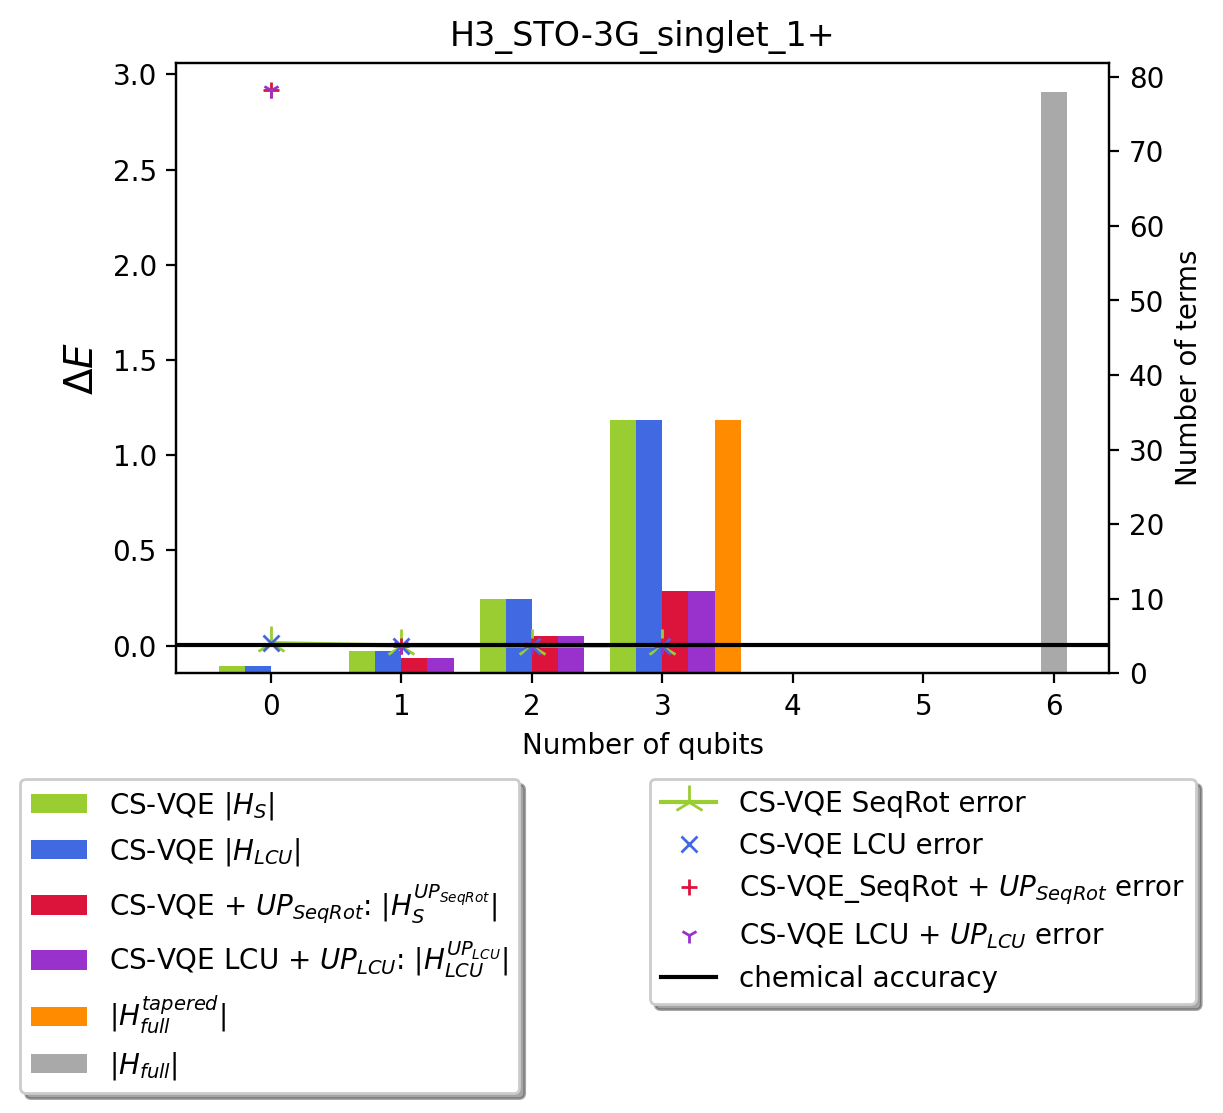

In [101]:
plot_n_terms_and_error(pre_tap_hamiltonians_relevent,
                           tapered_H_size_qubits,
                           myriad_results,
                           'H3_STO-3G_singlet_1+',  
                           dpi=200)


In [102]:
import pandas as pd
from copy import deepcopy

In [ ]:
data = {'molecule': [], 
        'No. qubits': [], 
        'No. terms CS-VQE LCU':[],
        'No. terms CS-VQE SeqRot':[],
        'No. terms CS-VQE LCU and LCU UP':[],
        'No. terms CS-VQE SeqRot and SeqRot UP':[],
        'Original No. qubits tapered H':[],
        'Original No. terms tapered H':[]
       }

for mol_name in myriad_UP_SeqRot_on_CSVQE_SeqRot.keys():
    
    True_gs_energy = myriad_CS_VQE_LCU_results[mol_name]['exp_conditions']['true_gs']
    
    # SeqRot UP ontop CSVQE
    for ind in sorted(myriad_UP_SeqRot_on_CSVQE_SeqRot[mol_name].keys()): 
        UP_SeqRot_E = myriad_UP_SeqRot_on_CSVQE_SeqRot[mol_name][ind]['E']
        if np.abs(True_gs_energy-UP_SeqRot_E)<=1.6e-3:
            SeqRot_UP_ind = deepcopy(ind)
            break

    # LCU UP ontop CSVQE
    for ind in sorted(myriad_UP_LCU_on_CSVQE_LCU[mol_name].keys()): 
        UP_LCU_E = myriad_UP_LCU_on_CSVQE_LCU[mol_name][ind]['E']
        if np.abs(True_gs_energy-UP_LCU_E)<=1.6e-3:
            LCU_UP_ind = deepcopy(ind)
            break
            
        
    # CSVQE only - LCU script A
    for ind in sorted([ind for key in myriad_CS_VQE_LCU_results[mol_name].keys() if isinstance(ind, int)]):
        CSVQE_LCU_E = myriad_CS_VQE_LCU_results[mol_name][ind]['E']
        if np.abs(True_gs_energy-CSVQE_LCU_E)<=1.6e-3:
            LCU_CSVQE_ind = deepcopy(ind)
            break
    
    # CSVQE only - SeqRot script A
    for ind in sorted([ind for key in myriad_CS_VQE_SeqRot_results[mol_name].keys() if isinstance(ind, int)]):
        CSVQE_SeqRot_E = myriad_CS_VQE_SeqRot_results[mol_name][ind]['E']
        if np.abs(True_gs_energy-CSVQE_SeqRot_E)<=1.6e-3:
            SeqRot_CSVQE_ind = deepcopy(ind)
            break
            
    if not (SeqRot_UP_ind==LCU_UP_ind==LCU_CSVQE_ind==SeqRot_CSVQE_ind):
        raise ValueError('different result for different methods! Something likely wrong')
        
    UP_SeqRot_terms = len(myriad_UP_SeqRot_on_CSVQE_SeqRot[mol_name][SeqRot_UP_ind]['AC_sets'])
    UP_LCU_terms = len(myriad_UP_LCU_on_CSVQE_LCU[mol_name][LCU_UP_ind]['AC_sets'])
    CSVQE_LCU_terms = len(myriad_CS_VQE_LCU_results[mol_name][LCU_CSVQE_ind]['H'])
    CSVQE_SeqRot_terms = len(myriad_CS_VQE_SeqRot_results[mol_name][SeqRot_CSVQE_ind]['H'])
    n_qubits = len(list(myriad_CS_VQE_LCU_results[mol_name][LCU_CSVQE_ind]['H'].keys())[0])
    
    tapered_n_qbits = tapered_H_size_qubits[mol_name]['n_qubits']
    tapered_n_terms = tapered_H_size_qubits[mol_name]['n_terms']
    
    data['molecule'].append(mol_name)
    
    # tapered
    data['Original No. qubits tapered H'].append(tapered_n_qbits)
    data['Original No. terms tapered H'].append(tapered_n_terms)
    
    # CS_VQE
    data['No. qubits'].append(n_qubits)
    data['No. terms CS-VQE LCU'].append(CSVQE_LCU_terms)
    data['No. terms CS-VQE SeqRot'].append(CSVQE_SeqRot_terms)
    
    # CS_VQE + UP
    data['No. terms CS-VQE LCU and LCU UP'].append(UP_LCU_terms)
    data['No. terms CS-VQE SeqRot and SeqRot UP'].append(UP_SeqRot_terms)

    